In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('census.csv', index_col='Year')

In [3]:
data.head()

,Population
Year,
1790,3.929
1800,5.308
1810,7.240
1820,9.638
1830,12.866


In [4]:
train_size = int(0.8 * len(data))
train = data.iloc[:train_size]
test = data.iloc[train_size:]

In [8]:
sigmoid([1, 2, 3], *res.x)

array([ 14.0976251,  28.1952502,  28.1952502])

Minimizing Parameters: [  1.79930656e+02   3.20249849e-02   1.90966278e+03]
Forecast mean squared error: 6.22


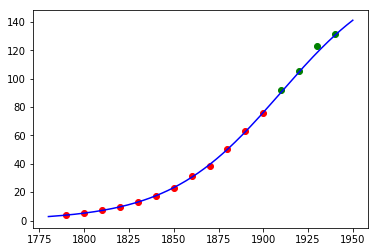

In [9]:
from scipy.optimize import minimize
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))
def quadratic(x, a, b, c):
    return a * (x - b)**2 + c
def linear(x, k, b):
    return k * x + b
def poly(x, params):
    return np.polyval(params, x)

function_used = sigmoid

#x_train = data.index.values
#y_train = data.Population.values
x_train = train.index.values
y_train = train.Population.values
x_test = test.index.values
y_test = test.Population.values

def squared_loss(params, fun):
    global x_train, y_train
    loss = fun(x_train, *params) - y_train
    return np.sum(loss ** 2)

p0 = [500, 0.05, 1940] # Initial values for sigmoid
#p0 = [0.005, 1770, 1] # Initial values for quadratic
#p0 = [1, -2000] # Initial values for linear
res = minimize(squared_loss, p0, args=(function_used))
print("Minimizing Parameters: {}".format(res.x))

# Calculate test error
from sklearn.metrics import mean_squared_error
print("Forecast mean squared error: "
      "{0:.2f}".format(mean_squared_error(y_test, function_used(x_test, *res.x))))

x_plot = np.linspace(1780, 1950, 200)
y_plot = function_used(x_plot, *res.x)
plt.plot(x_plot, y_plot, color='b')
plt.scatter(x_train, y_train, color='r')
plt.scatter(x_test, y_test, color='g')
plt.show()

In [7]:
sigmoid(x_train, *res.x)

array([ 28.1952502,  28.1952502,  28.1952502,  28.1952502,  28.1952502,
        28.1952502,  28.1952502,  28.1952502,  28.1952502,  28.1952502,
        28.1952502,  28.1952502])